#Coffee, Lifestyle, and Health Risk Modeling

Global coffee consumption is rapidly increasing, especially among office workers, students, and young professionals. On the other hand, there are concerns about side effects such as sleep disturbances, increased stress, and long-term health risks. Coffee companies, health-tech startups, and wellness program providers need data-driven insights to balance coffee consumption trends with consumer health.

Key questions:

How does coffee consumption affect sleep quality, stress, and health?
Can we predict health risks based on coffee consumption and lifestyle?

Install Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

Import Data and Read Data

In [11]:
FILE_ID = "1vpSvMbFClBkrYE7MaO7Z2OXYjDnFqEjm"
file_url = f"https://drive.google.com/uc?id={FILE_ID}"

df = pd.read_csv(file_url)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [12]:
display(df.head(10))

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
5,6,32,Male,Mexico,3.4,326.4,6.4,Good,27.0,82,Low,8.8,NaN,Service,0,0
6,7,53,Male,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
8,9,29,Male,UK,1.7,162.0,7.1,Good,21.7,60,Low,2.2,NaN,Service,1,1
9,10,41,Female,Switzerland,4.0,383.2,6.4,Good,30.4,69,Low,11.9,Mild,Office,0,0


In [13]:
display(df.describe())

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Analysis by Variable

Age: The age range of subjects was from 18 to 80 years, with an average age of approximately 35 years. The mean and median (50%) values were close (34.95 and 34.0), indicating a relatively balanced age distribution.
Coffee & Caffeine Intake: Coffee intake varied from 0 to 8.2 servings, and the related caffeine intake ranged from 0 to 780.3 mg. The average caffeine intake was approximately 238.4 mg, indicating a wide variation in caffeine consumption.
Sleep Duration: The average sleep duration was 6.64 hours, ranging from 3 to 10 hours. This figure reflects the general variation in adult sleep patterns.
BMI (Body Mass Index): The average BMI was 23.99, which falls within the healthy weight category (18.5 - 24.9). However, the range is wide (15.0 to 38.2), indicating that there are underweight, overweight, and obese individuals in the dataset.
Heart Rate: The average heart rate is 70.62 beats per minute (bpm), which is within the normal range (typically 60-100 bpm).
Hours of Physical Activity: Physical activity varies significantly, from 0 to 15 hours per week, with an average of 7.49 hours. This indicates that there are very different lifestyles in terms of exercise among the subjects.
Smoking & Alcohol Consumption: The minimum and maximum values (0 and 1) for both variables indicate that they are binary variables (e.g., 0 = No, 1 = Yes). The average values show:
Approximately 20% (mean = 0.2004) of the subjects were smokers.
Approximately 30% (mean = 0.3007) of subjects consume alcohol.

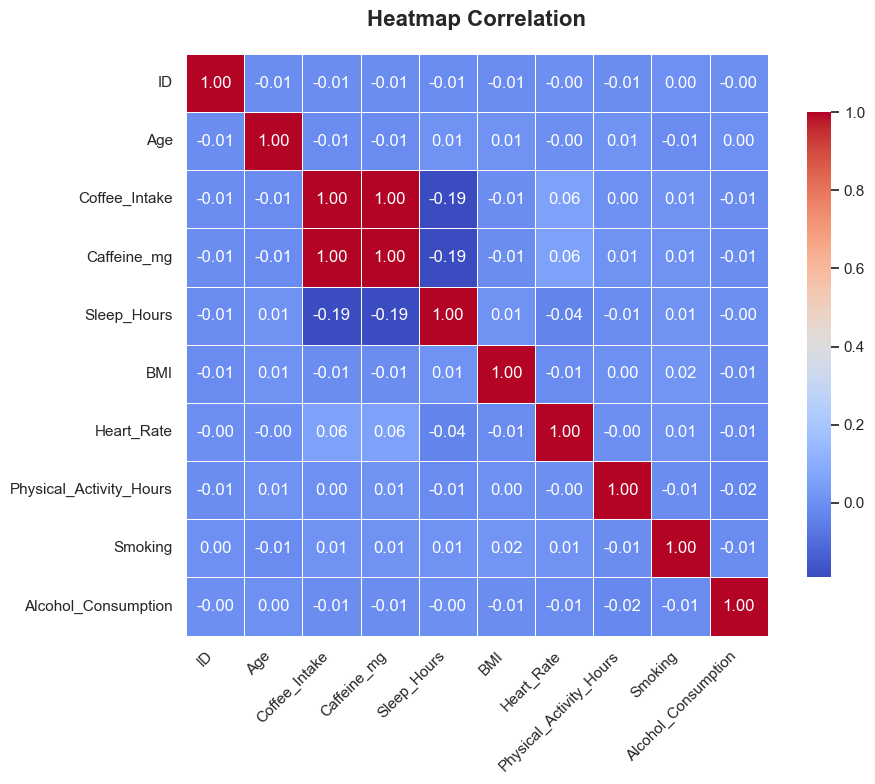

In [25]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title("Heatmap Correlation", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insight: Coffe_Intake have strong correlation with Caffeine_mg

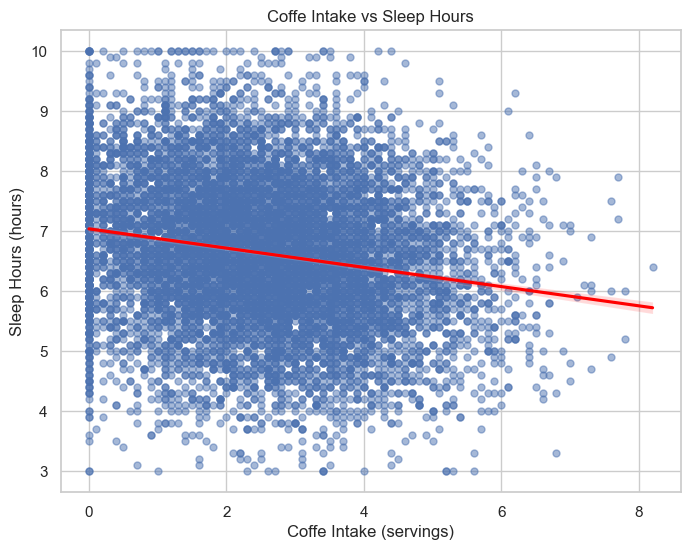

In [26]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Coffee_Intake",
    y="Sleep_Hours",
    data=df,
    scatter_kws={"s": 25, "alpha": 0.5},
    line_kws={"color": "red"}
)
plt.title("Coffe Intake vs Sleep Hours")
plt.xlabel("Coffe Intake (servings)")
plt.ylabel("Sleep Hours (hours)")
plt.show()

Insight: Plot have negative correlation. The more coffee you drink, the less you sleep.

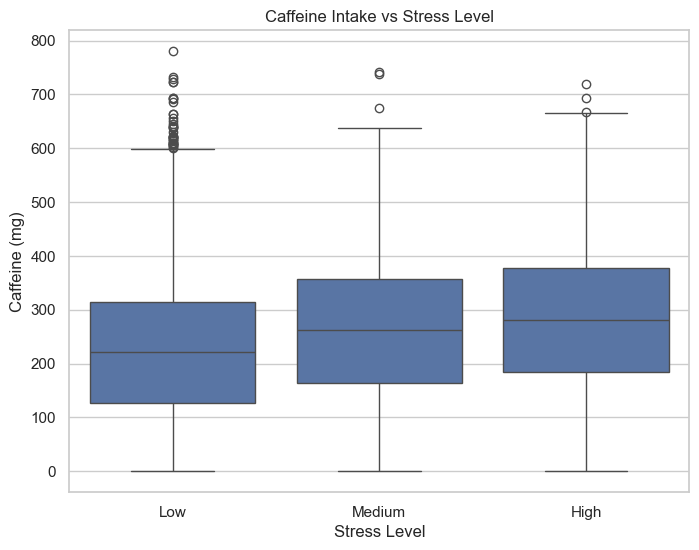

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='Caffeine_mg', data=df)
plt.title('Caffeine Intake vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Caffeine (mg)')
plt.show()

Insight: From the plot above, the median line rises from low to high, but there are outliers in the three boxplots with Caffeine (mg) above the average.

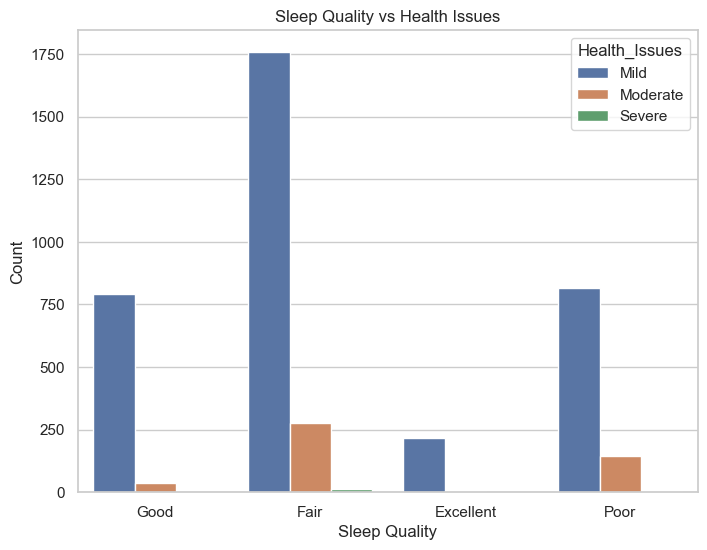

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep_Quality', hue='Health_Issues')
plt.title('Sleep Quality vs Health Issues')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

Insight: Health_Issues None have biggest count Sleep_Quality type Good and Excelent. Health_Issues Mild have biggest count Sleep_Quality type Fair and Poor.

Main Conclusion: Coffee consumption does affect sleep and stress, but its effects are not direct or absolute. Other lifestyle factors such as physical activity, BMI, and age play a greater and more predictable role in determining a person's stress levels and health risks. Therefore, a holistic and data-driven approach that focuses not only on coffee but also on more fundamental lifestyle factors will be more effective in promoting optimal health and wellness.